In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

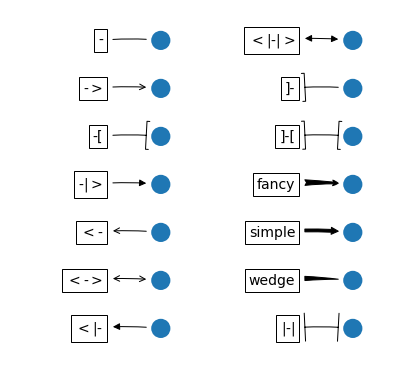

In [5]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig = plt.figure(figsize=(4 * ncol / 1.5, figheight / 1.5))
fontsize = 0.2 * 70


ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4 * ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s


for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i // nrow) * 4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

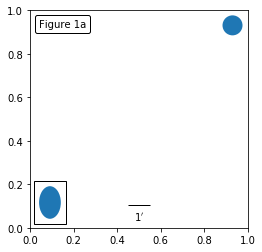

In [145]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)


class AnchoredText(AnchoredOffsetbox):
    def __init__(self, s, loc, pad=0.4, borderpad=0.5,
                 prop=None, frameon=True):
        self.txt = TextArea(s, minimumdescent=False)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self.txt, prop=prop, frameon=frameon)


def draw_text(ax):
    """
    Draw a text-box anchored to the upper-left corner of the figure.
    """
    at = AnchoredText("Figure 1a", loc='upper left', frameon=True)
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)


class AnchoredDrawingArea(AnchoredOffsetbox):
    def __init__(self, width, height, xdescent, ydescent,
                 loc, pad=0.4, borderpad=0.5, prop=None, frameon=True):
        self.da = DrawingArea(width, height, xdescent, ydescent)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self.da, prop=None, frameon=frameon)


def draw_circle(ax):
    """
    Draw a circle in axis coordinates
    """
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(20, 20, 0, 0,
                              loc='upper right', pad=0., frameon=False)
    p = Circle((10, 10), 10)
    ada.da.add_artist(p)
    ax.add_artist(ada)


class AnchoredEllipse(AnchoredOffsetbox):
    def __init__(self, transform, width, height, angle, loc,
                 pad=0.1, borderpad=0.1, prop=None, frameon=True):
        """
        Draw an ellipse the size in data coordinate of the give axes.

        pad, borderpad in fraction of the legend font size (or prop)
        """
        self._box = AuxTransformBox(transform)
        self.ellipse = Ellipse((0, 0), width, height, angle)
        self._box.add_artist(self.ellipse)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)


def draw_ellipse(ax):
    """
    Draw an ellipse of width=0.1, height=0.15 in data coordinates
    """
    ae = AnchoredEllipse(ax.transData, width=0.1, height=0.15, angle=0.,
                         loc='lower left', pad=0.5, borderpad=0.4,
                         frameon=True)

    ax.add_artist(ae)


class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)


def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    asb = AnchoredSizeBar(ax.transData,
                          0.1,
                          r"1$^{\prime}$",
                          loc='lower center',
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


ax = plt.gca()
ax.set_aspect(1.)

draw_text(ax)
draw_circle(ax)
draw_ellipse(ax)
draw_sizebar(ax)

plt.show()

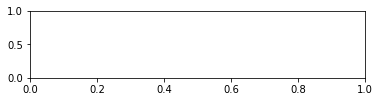

In [47]:

ax = plt.gca()
ax.set_aspect(0.2)

plt.show()

C:\Users\luke\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


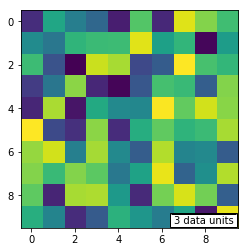

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
fig, ax = plt.subplots()
ax.imshow(np.random.random((10,10)))
bar = AnchoredSizeBar(ax.transData, 3, '3 data units', 4)
ax.add_artist(bar)
fig.show()

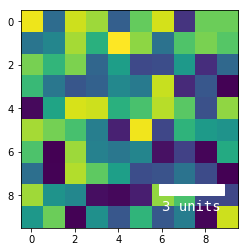

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
fig, ax = plt.subplots()
ax.imshow(np.random.random((10,10)))
fontprops = fm.FontProperties(size=14, family='monospace')

bar = AnchoredSizeBar(ax.transData, 3, '3 units', 4, pad=0.5, sep=5, borderpad=0.5, frameon=False, size_vertical=0.5, color='white', fontproperties=fontprops)
ax.add_artist(bar)
fig.show()



In [2]:
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

In [ ]:
ax = plt.gca()
ax = draw_tree.draw_circle(ax)



In [34]:
def draw_ellipse(ax):
    """
    Draw an ellipse of width=0.1, height=0.15 in data coordinates
    """
    ae = AnchoredEllipse(ax.transData, width=0.1, height=0.15, angle=0.,
                         loc='lower left', pad=0.5, borderpad=0.4,
                         frameon=True)

    ax.add_artist(ae)


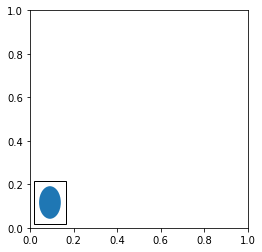

In [35]:
ax = plt.gca()
ax.set_aspect(1.)

draw_ellipse(ax)


plt.show()

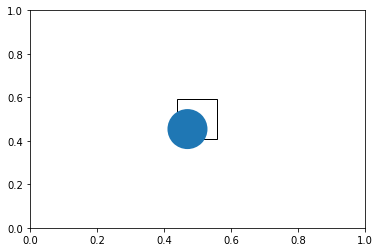

In [13]:
class AnchoredDrawingArea(AnchoredOffsetbox):
    def __init__(self, width, height, xdescent, ydescent,
                 loc, pad=0.4, borderpad=0.5, prop=None, frameon=True):
        self.da = DrawingArea(width, height, xdescent, ydescent)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self.da, prop=None, frameon=frameon)


def draw_circle(ax):
    """
    Draw a circle in axis coordinates
    """
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(40, 40, 0, 0,
                              loc='center', pad=0., frameon=True)
    p = Circle((10, 10), 20)
    ada.da.add_artist(p)
    ax.add_artist(ada)
    
ax = plt.gca()
ax = draw_circle(ax)

plt.show()    
    

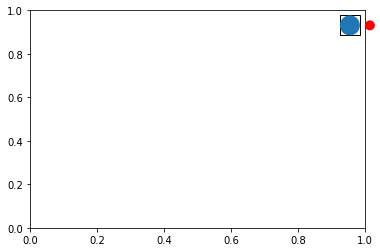

In [20]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
from matplotlib.patches import Circle
ada = AnchoredDrawingArea(20, 20, 0, 0,
                          loc='upper right', pad=0., frameon=True)
p1 = Circle((10, 10), 10)
ada.drawing_area.add_artist(p1)
p2 = Circle((30, 10), 5, fc="r")
ada.drawing_area.add_artist(p2)

ax = plt.gca()
ax.add_artist(ada)



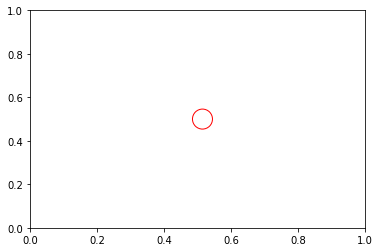

In [137]:
class AnchoredDrawingArea(AnchoredOffsetbox):
    def __init__(self, width, height, xdescent, ydescent,
                 loc, pad=0.8, borderpad=0.5, prop=None, frameon=True):
        self.da = DrawingArea(width, height, xdescent, ydescent)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self.da, prop=None, frameon=frameon)


def draw_circle(ax):
    """
    Draw a circle in axis coordinates
    """
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(20, 20, 0, 0,
                              loc='center', pad=5., frameon=False)
    p = Circle((15, 10), 10, facecolor='none', edgecolor = 'r')
    ada.da.add_artist(p)
    ax.add_artist(ada)
    
ax = plt.gca()
ax = draw_circle(ax)

plt.show()   

0 ('-', <class 'matplotlib.patches.ArrowStyle.Curve'>)
1 ('<-', <class 'matplotlib.patches.ArrowStyle.CurveA'>)
2 ('->', <class 'matplotlib.patches.ArrowStyle.CurveB'>)
3 ('<->', <class 'matplotlib.patches.ArrowStyle.CurveAB'>)
4 ('<|-', <class 'matplotlib.patches.ArrowStyle.CurveFilledA'>)
5 ('-|>', <class 'matplotlib.patches.ArrowStyle.CurveFilledB'>)
6 ('<|-|>', <class 'matplotlib.patches.ArrowStyle.CurveFilledAB'>)
7 (']-[', <class 'matplotlib.patches.ArrowStyle.BracketAB'>)
8 (']-', <class 'matplotlib.patches.ArrowStyle.BracketA'>)
9 ('-[', <class 'matplotlib.patches.ArrowStyle.BracketB'>)
10 ('|-|', <class 'matplotlib.patches.ArrowStyle.BarAB'>)
11 ('simple', <class 'matplotlib.patches.ArrowStyle.Simple'>)
12 ('fancy', <class 'matplotlib.patches.ArrowStyle.Fancy'>)
13 ('wedge', <class 'matplotlib.patches.ArrowStyle.Wedge'>)


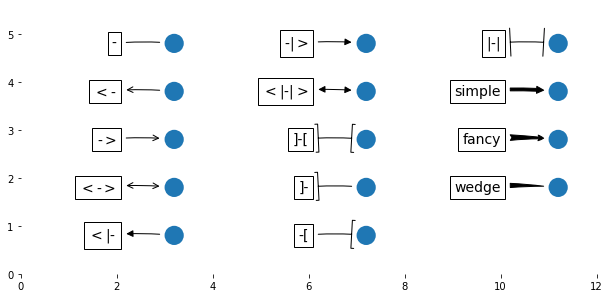

In [88]:
styles = mpatches.ArrowStyle.get_styles()

ncol = 3
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig = plt.figure(figsize=(4 * ncol / 1.5, figheight / 1.5))
fontsize = 0.2 * 70


ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4 * ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s


for i, (stylename, styleclass) in enumerate(styles.items()):
    print(i, (stylename, styleclass))
    x = 3.2 + (i // nrow) * 4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))



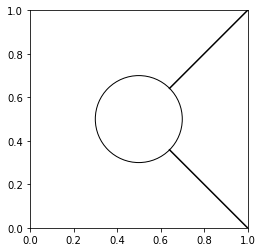

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import math


x = 0.5
y= 0.5
r = 0.2

d = math.sqrt((r**2.)/2.)

ax = plt.gca()
ax.set_aspect(1.)

line1 = lines.Line2D([x+d, 1], [x-d, 0], color = 'black')
line2 = lines.Line2D([x+d, 1], [x+d, 1], color = 'black')
p = mpatches.Circle((x, x), r, facecolor='none', edgecolor = 'black')


ax.add_line(line1)
ax.add_line(line2)
ax.add_patch(p)


plt.show()




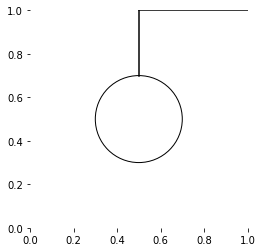

In [75]:
a = 1
x = 0.5
y= 0.5 *a
r = 0.2

d = math.sqrt((r**2.)/2.)

ax = plt.gca(frameon=False)

ax.set_aspect(1.)

line1 = lines.Line2D([0.5, 0.5], [0.5+r, 1], color = 'black')
line2 = lines.Line2D([0.5, 1], [1, 1], color = 'black')



p = mpatches.Circle((x, x), r, facecolor='none', edgecolor = 'black')


ax.add_line(line1)
ax.add_line(line2)
ax.add_patch(p)


plt.show()

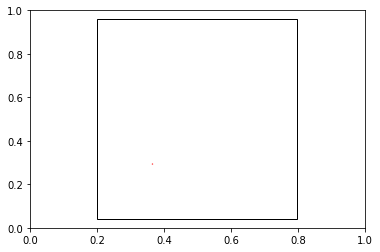

In [295]:
class AnchoredDrawingArea(AnchoredOffsetbox):
    def __init__(self, width, height, xdescent, ydescent,
                 loc, pad=0.8, borderpad=0.05, prop=None, frameon=True):
        self.da = DrawingArea(width, height, xdescent, ydescent)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self.da, prop=None, frameon=frameon)


def draw_circle(ax):
    from matplotlib.patches import Circle
    ada = AnchoredDrawingArea(100, 100, 0, 0,
                              loc='center', pad=5., frameon=True)
    p = Circle((5, 5), 0.2, facecolor='none', edgecolor = 'r')
    ada.da.add_artist(p)
    ax.add_artist(ada)
    
ax = plt.gca()
ax = draw_circle(ax)

plt.show() 

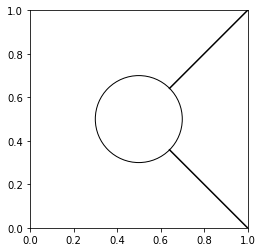

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import math


x = 0.5
y= 0.5
r = 0.2

d = math.sqrt((r**2.)/2.)

ax = plt.gca()
ax.set_aspect(1.)

line1 = lines.Line2D([x+d, 1], [x-d, 0], color = 'black')
line2 = lines.Line2D([x+d, 1], [x+d, 1], color = 'black')
p = mpatches.Circle((x, x), r, facecolor='none', edgecolor = 'black')


ax.add_line(line1)
ax.add_line(line2)
ax.add_patch(p)


plt.show()


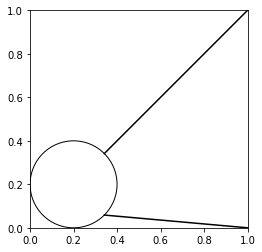

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import math



y= 0.5
r = 0.2
x =r
d = math.sqrt((r**2.)/2.)

ax = plt.gca()
ax.set_aspect(1.)

line1 = lines.Line2D([x+d, 1], [x-d, 0], color = 'black')
line2 = lines.Line2D([x+d, 1], [x+d, 1], color = 'black')
p = mpatches.Circle((x, x), r, facecolor='none', edgecolor = 'black')


ax.add_line(line1)
ax.add_line(line2)
ax.add_patch(p)


plt.show()

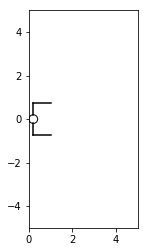

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import math

fig, ax = plt.subplots(frameon=False)
#ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)


y= 0.
r = 0.2
x =r
d = math.sqrt((r**2.)/2.)

xlim = [0, 5]
ylim = [-5, 5]


ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect(1.)

p1 = mpatches.Circle((x, y), r, facecolor='none', edgecolor = 'black')
p2 = mpatches.Circle((x+0.75, y), r, facecolor='none', edgecolor = 'black')



line1 = lines.Line2D([r, r], [r, 0.75], color = 'black')
line2 = lines.Line2D([r, 1], [0.75, 0.75], color = 'black')

line3 = lines.Line2D([r, r], [-r, -0.75], color = 'black')
line4 = lines.Line2D([r, 1], [-0.75, -0.75], color = 'black')

ax.add_line(line1)
ax.add_line(line2)
ax.add_line(line3)
ax.add_line(line4)


ax.add_patch(p)




([3, 4], [2, 3], [1, 2])


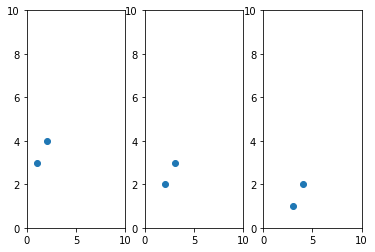

In [97]:
import matplotlib.pyplot as plt

DATA_x = ([1, 2],
          [2, 3],
          [3, 4])

DATA_y = DATA_x[::-1]
print(DATA_y)
XLIMS = [[0, 10]] * 3
YLIMS = [[0, 10]] * 3

for j, (x, y, xlim, ylim) in enumerate(zip(DATA_x, DATA_y, XLIMS, YLIMS)):
    ax = plt.subplot(1, 3, j + 1)
    ax.scatter(x, y)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

<StemContainer object of 3 artists>

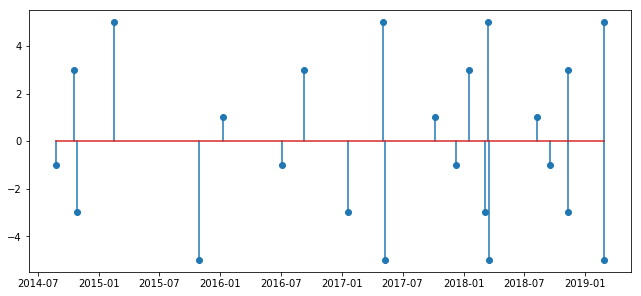

In [275]:
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)


markerline, stemline, baseline = ax.stem(dates, levels)




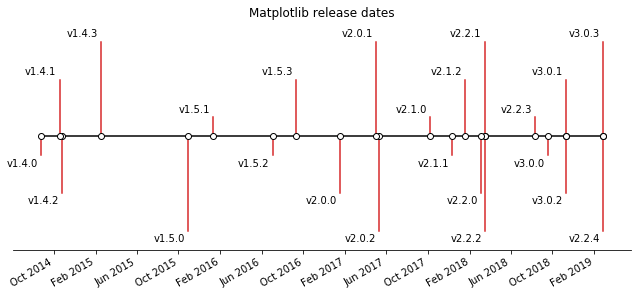

In [270]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-")

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

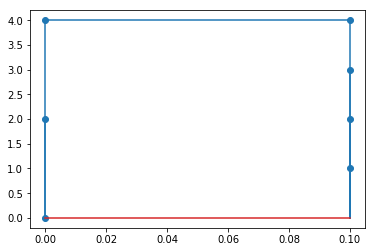

In [80]:
p = [0, 2, 4, 1, 2, 3, 4]
a = [0, 0, 0, 0.1, 0.1, 0.1, 0.1]


#fig, ax = plt.subplots(constrained_layout=True)
ax = plt.gca()

markerline, stemline, baseline = ax.stem(a, p)





line1 = lines.Line2D([0, 0.1], [0, 0])
line1 = lines.Line2D([0, 0.1], [4, 4])

ax.add_line(line1)


plt.show()